2.37 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


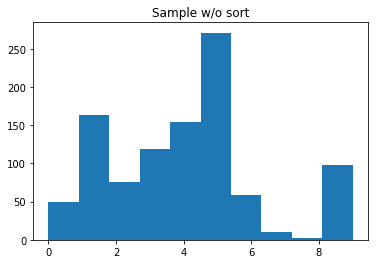

2 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


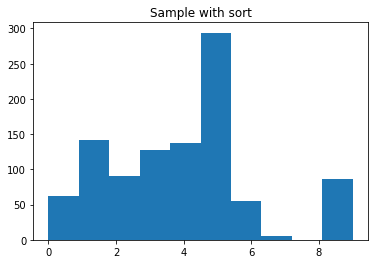

In [290]:
#task 1

import numpy as np
import matplotlib.pyplot as plt
import time

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

def rand_0_to_9(weights, n):
    rng.current = 1
    random = [rng() for i in range(n)]
    sample = np.zeros(n)
    
    for i in range(n):
        s = weights[0]
        j = 1
        while (s < random[i]):
            s += weights[j]
            j += 1
        sample[i] = j - 1
    return sample

def sort_rand_0_to_9(weights, ind, n):
    rng.current = 1
    random = [rng() for i in range(n)]
    sample = np.zeros(n)
    
    for i in range(n):
        s = weights[9]
        j = 9
        while (s < random[i]):
            j -= 1
            s += weights[j]
        sample[i] = ind[j]
    return sample
        
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights /= weights.sum()

%timeit sample_1 = rand_0_to_9(weights, 1000)
plt.hist(sample_1)
plt.title("Sample w/o sort")
plt.show()

ind = weights.argsort()
weights.sort()

%timeit sample_2 = sort_rand_0_to_9(weights, ind, 1000)
plt.hist(sample_2)
plt.title("Sample with sort")
plt.show()

We see that with sorted weights faster. It is obvious because we faster get in bigger interval.

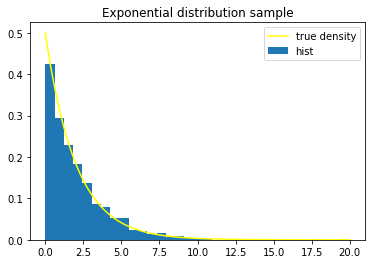

In [291]:
#task 2

import numpy as np
import matplotlib.pyplot as plt

Lambda = 1/2
random = np.random.random(1000)

for i in range(1000):
    sample[i] = np.log(1 - random[i]) / (- Lambda)
    
x = np.arange(0, 20, 0.01)
true_density = Lambda * np.exp(- Lambda * x)

plt.hist(sample, bins = 30, density = True, label = "hist")
plt.plot(x, true_density, label = "true density" , color = 'yellow')
plt.title("Exponential distribution sample")
plt.legend()
plt.show()

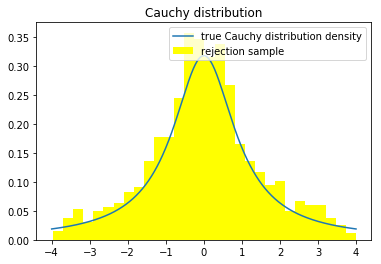

In [292]:
#task 3

# 1 / 8 - uniform distribution density in [-4, 4]

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

dist = stats.cauchy()
x = np.linspace(-4, 4, 1000)
sample = np.zeros(1000)    
j = 0

while(j < 1000):
    z = 8 * np.random.rand() - 4 
    u = np.random.rand()
    if (u <= dist.pdf(z) / (4 * 1/8)):
        sample[j] = z
        j += 1
        
plt.hist(sample, bins = 30, density = True, label = "rejection sample", color='yellow')
plt.plot(x, dist.pdf(x), label = "true Cauchy distribution density")
plt.title("Cauchy distribution")
plt.legend()
plt.show()

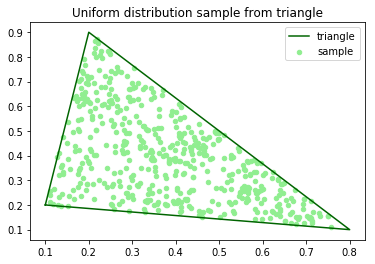

In [293]:
#task 4

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

x = np.zeros(500)
y = np.zeros(500)
        
for j in range(500):
    x[j] = np.random.rand() * np.sqrt(0.5)
    y[j] = np.random.rand() * np.sqrt(0.5)
    if y[j] > (np.sqrt(0.5) - x[j]):
        temp = np.sqrt(0.5) - x[j]
        x[j] = np.sqrt(0.5) - y[j]
        y[j] = temp
        
angle = np.arctan(-1/7)
x_sample = x * np.cos(angle) - y * np.sin(angle) + 0.1
y_sample =x * np.sin(angle) + y * np.cos(angle) + 0.2
x_points = 0.1 * np.array([1, 2, 8, 1])
y_points = 0.1 * np.array([2, 9, 1, 2])
#polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
        
plt.scatter(x_sample, y_sample, s = 20, label = "sample", color = 'lightgreen')
#plt.gca().add_collection(PatchCollection([polygon]))
plt.plot(x_points, y_points, label = "triangle", color = 'darkgreen')
plt.title("Uniform distribution sample from triangle")
plt.legend()
plt.show()

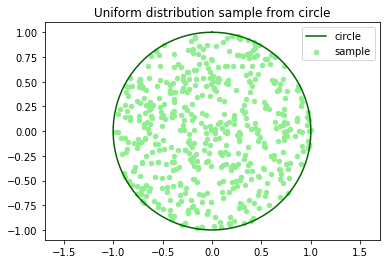

In [214]:
#task 5

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
 
t = np.linspace(0, 2 * np.pi, 100)
angle = [2 * np.pi * np.random.rand() for i in range(500)]
r = [np.sqrt(np.random.rand()) for i in range(500)]
x = np.zeros(500)
y = np.zeros(500)

for j in range(500):
    x[j] = r[j] * np.cos(angle[j])
    y[j] = r[j] * np.sin(angle[j])
    
plt.scatter(x, y, s = 20, label = "sample", color = 'lightgreen')
plt.plot(np.sin(t), np.cos(t), label = "circle", color = 'darkgreen')
plt.axis('equal')
plt.title("Uniform distribution sample from circle")
plt.legend()
plt.show()

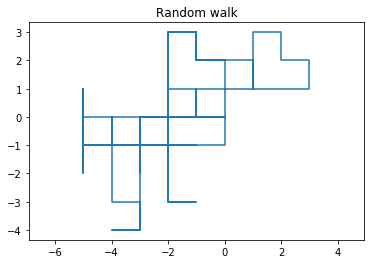

In [295]:
#task 6

import numpy as np
from matplotlib.patches import Circle

n = 100
u = np.ones(n)
v = np.ones(n)
u_minus = np.random.choice(np.arange(n), n // 2, False)
v_minus = np.random.choice(np.arange(n), n // 2, False)
u[u_minus] = - 1
v[v_minus] = - 1
x_step = (u + v) / 2
y_step = (u - v) / 2
x = np.zeros(n + 1)
y = np.zeros(n + 1)

for i in range(1, n):
    x[i] = x[i - 1] + x_step[i - 1]
    y[i] = y[i - 1] + y_step[i - 1]
            
plt.plot(x, y)
plt.axis('equal')
plt.title("Random walk")
plt.show()

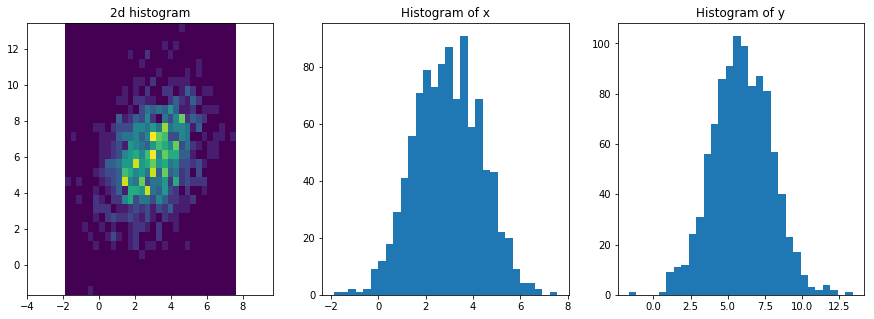

In [289]:
#task 7

import numpy as np
import matplotlib.pyplot as plt

def Box_Muller():
    s = 0
    while((s > 1) or (s == 0)):
        x = 2 * np.random.rand() - 1
        y = 2 * np.random.rand() - 1
        s = x * x + y * y
    z0 = x * np.sqrt(- 2 * np.log(s) / s) 
    z1 = y * np.sqrt(- 2 * np.log(s) / s) 
    return z0, z1

n = 1000
xi = np.transpose(np.array([Box_Muller() for i in range(n)]))
var = np.array([2, 1, 1, 4]).reshape(2, 2)
A = np.linalg.cholesky(var)
eta = A @ xi + np.array([3, 6]).reshape(2,1)
x = eta[0]
y = eta[1]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins = 30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

In [296]:
#task 8 

import numpy as np
import matplotlib.pyplot as plt
import math

def amount_of_colors(values, weights, n):
    K = np.random.choice(values, None, True, weights) 
    colors = np.zeros(n)
    for i in range(n):
        colors[i] = np.random.randint(1, K + 1)
    return len(np.unique(colors))

def Bell_number(n):
    b = np.zeros(n + 1)
    b[0] = 1
    for i in range(1, n + 1):
        s = 0
        for k in range(i):
            s += b[k] * math.factorial(i - 1) / (math.factorial(k) * math.factorial(i - 1 - k))
        b[i] = s
    return b[n]

s = 0
n = 100
weights = np.zeros(n)

for k in range(1, n + 1):
    weights[k - 1] = pow(k, n) / (math.factorial(k) * np.e * Bell_number(n))
    s += weights[k - 1]

weights = weights/s #norming weights to probabilities
values = 1 + np.arange(n)
tries = np.array([amount_of_colors(values, weights, n) for i in range(1000)])
print("Mean amount of subsets from 100 elements set = ", tries.mean())


Mean amount of subsets from 100 elements set =  28.73
